# A K-mean implementation in TensorFlow

### Let's generate the data, 1000 points, 1 gaussian clouds

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.animation import FuncAnimation


num_puntos = 1000
conjunto_puntos = []
for i in range(num_puntos):
     x1= np.random.normal(0.0, 0.55)
     y1= x1 * 0.541 + 0.3 + np.random.normal(0.0, 0.053)
     conjunto_puntos.append([x1, y1])

x_data = [v[0] for v in conjunto_puntos]
y_data = [v[1] for v in conjunto_puntos]

### Visualize the data clouds, using pandas and matplotlib.

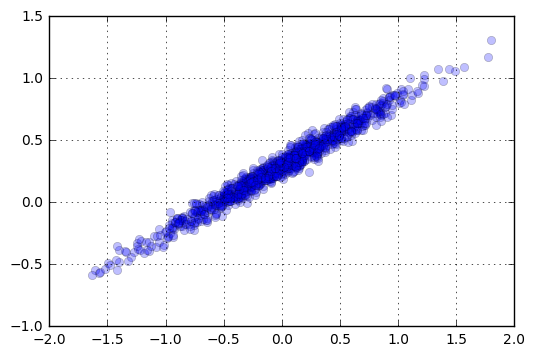

In [6]:
# Display data
plt.plot(x_data, y_data, 'bo', alpha=.25)
plt.grid()
plt.show()

## TensorFlow initialization and declarations

### Preparing tensorflow graph

In [13]:
# tensorflow variables for our Model
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = x_data * W + b

# tensorflow declaration for training and optimizer
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


### Setting up the animation plot

<IPython.core.display.Javascript object>


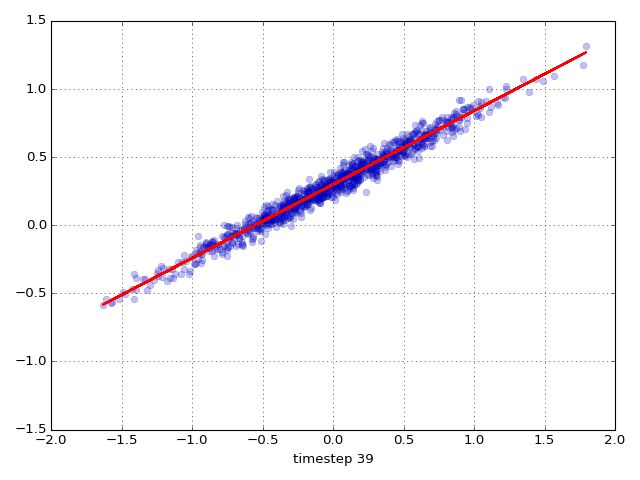

In [23]:
# to get the animation working on IPython notebook
%matplotlib nbagg 

# Init variables and start TF session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Graphic display
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(x_data, y_data, 'bo', alpha=.25)
line, = ax.plot(x_data, sess.run(W) * x_data + sess.run(b), 'r-', linewidth=2)

# Animation
def update(i):
    sess.run(train)
    print(i, sess.run(W), sess.run(b))
    # Graphic display
    label = 'timestep {0}'.format(i)
    line.set_ydata(sess.run(W) * x_data + sess.run(b))
    ax.set_xlabel(label)
    return line, ax

# FuncAnimation will call the 'update' function for each frame; here
# animating over 40 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=40, interval=300, repeat=False)
plt.grid()
plt.show()